In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
# função utilidade
def util(c, sigma):
    if c>0:
        return (c**(1-sigma)-1)/(1-sigma)
    else:
        return -np.inf
    
# densidade da uniforme discreta
def f(x, N = 1):
    return 1/N


In [3]:
# == Definindo alguns parâmetros == #

N = 800 # número de estados
w_grid = np.linspace(10, 20, N)

b = 6.0  # seguro desemprego
pi = 0.2 # probabilidade de ser demitido

sigma = 2.0
beta  = 0.98

In [4]:
def objective(w_grid, v, sigma, beta, pi):
#     global Ev
    N = len(w_grid)
    Fobj = np.zeros((N,2))
    
    
    Ev = 0
    for j in range(N):
        Ev = Ev + v[j] * f(w_grid[j], N)

    for i in range(N):

        # não aceita w
        Fobj[i,0] = util(b,sigma) + beta * Ev
    
        # aceita w
        Fobj[i,1] = util(w_grid[i],sigma) + beta * ( (1-pi)*v[i] + pi * v[0])

    return Fobj

In [5]:
# fobj = objective(w_grid, Tv[1], sigma, beta, pi)


In [6]:
def update_v_and_g(vn):
    
    fobj = objective(w_grid, vn[-1], sigma, beta, pi)
    
    Tv = np.zeros(N)
    g  = np.zeros(N)
    for i in range(N):
        
        Tv[i] = max(fobj[i,:])
        g[i]  = np.argmax(fobj[i,:])

    vn.append(Tv)
    
    return vn, g

In [7]:
def bellman(Tv):
    i = 0
    norma=1
    while norma>1e-6:
        Tv, g = update_v_and_g(Tv)
        norma = max(abs(Tv[i+1] - Tv[i]))    
        i += 1
        print("iteração = {:3d} {:3} [norma] = {:3.2}".format(i,'...',norma))
    return (Tv, g)

In [8]:
# Programa principal 
start = time.time()

Tv = [np.zeros(N)]

Tv, g = bellman(Tv)

end = time.time()

print('Tempo gasto: {:7.5f} segundos'.format(end-start))

iteração =   1 ... [norma] = 0.95
iteração =   2 ... [norma] = 0.92
iteração =   3 ... [norma] = 0.9
iteração =   4 ... [norma] = 0.87
iteração =   5 ... [norma] = 0.85
iteração =   6 ... [norma] = 0.83
iteração =   7 ... [norma] = 0.81
iteração =   8 ... [norma] = 0.8
iteração =   9 ... [norma] = 0.78
iteração =  10 ... [norma] = 0.76
iteração =  11 ... [norma] = 0.75
iteração =  12 ... [norma] = 0.73
iteração =  13 ... [norma] = 0.72
iteração =  14 ... [norma] = 0.7
iteração =  15 ... [norma] = 0.69
iteração =  16 ... [norma] = 0.68
iteração =  17 ... [norma] = 0.66
iteração =  18 ... [norma] = 0.65
iteração =  19 ... [norma] = 0.64
iteração =  20 ... [norma] = 0.62
iteração =  21 ... [norma] = 0.61
iteração =  22 ... [norma] = 0.6
iteração =  23 ... [norma] = 0.59
iteração =  24 ... [norma] = 0.58
iteração =  25 ... [norma] = 0.56
iteração =  26 ... [norma] = 0.55
iteração =  27 ... [norma] = 0.54
iteração =  28 ... [norma] = 0.53
iteração =  29 ... [norma] = 0.52
iteração =  30 ...

iteração = 263 ... [norma] = 0.0046
iteração = 264 ... [norma] = 0.0045
iteração = 265 ... [norma] = 0.0044
iteração = 266 ... [norma] = 0.0043
iteração = 267 ... [norma] = 0.0042
iteração = 268 ... [norma] = 0.0042
iteração = 269 ... [norma] = 0.0041
iteração = 270 ... [norma] = 0.004
iteração = 271 ... [norma] = 0.0039
iteração = 272 ... [norma] = 0.0038
iteração = 273 ... [norma] = 0.0038
iteração = 274 ... [norma] = 0.0037
iteração = 275 ... [norma] = 0.0036
iteração = 276 ... [norma] = 0.0035
iteração = 277 ... [norma] = 0.0035
iteração = 278 ... [norma] = 0.0034
iteração = 279 ... [norma] = 0.0033
iteração = 280 ... [norma] = 0.0033
iteração = 281 ... [norma] = 0.0032
iteração = 282 ... [norma] = 0.0031
iteração = 283 ... [norma] = 0.0031
iteração = 284 ... [norma] = 0.003
iteração = 285 ... [norma] = 0.0029
iteração = 286 ... [norma] = 0.0029
iteração = 287 ... [norma] = 0.0028
iteração = 288 ... [norma] = 0.0028
iteração = 289 ... [norma] = 0.0027
iteração = 290 ... [norma] = 0

iteração = 526 ... [norma] = 2.3e-05
iteração = 527 ... [norma] = 2.2e-05
iteração = 528 ... [norma] = 2.2e-05
iteração = 529 ... [norma] = 2.1e-05
iteração = 530 ... [norma] = 2.1e-05
iteração = 531 ... [norma] = 2e-05
iteração = 532 ... [norma] = 2e-05
iteração = 533 ... [norma] = 2e-05
iteração = 534 ... [norma] = 1.9e-05
iteração = 535 ... [norma] = 1.9e-05
iteração = 536 ... [norma] = 1.9e-05
iteração = 537 ... [norma] = 1.8e-05
iteração = 538 ... [norma] = 1.8e-05
iteração = 539 ... [norma] = 1.7e-05
iteração = 540 ... [norma] = 1.7e-05
iteração = 541 ... [norma] = 1.7e-05
iteração = 542 ... [norma] = 1.6e-05
iteração = 543 ... [norma] = 1.6e-05
iteração = 544 ... [norma] = 1.6e-05
iteração = 545 ... [norma] = 1.5e-05
iteração = 546 ... [norma] = 1.5e-05
iteração = 547 ... [norma] = 1.5e-05
iteração = 548 ... [norma] = 1.5e-05
iteração = 549 ... [norma] = 1.4e-05
iteração = 550 ... [norma] = 1.4e-05
iteração = 551 ... [norma] = 1.4e-05
iteração = 552 ... [norma] = 1.3e-05
iteraçã

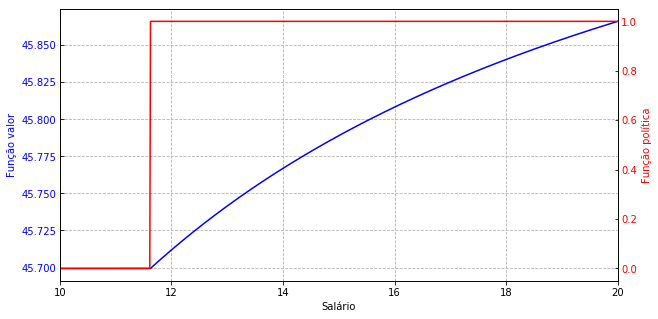

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_ylabel('Função valor', color='blue')
ax1.set_xlabel('Salário', color='k')
ax1.tick_params(axis='y', direction='in', labelcolor='blue')
ax1.grid(linestyle='--')
ax1.plot(w_grid,Tv[-1], color='blue')
ax1.set_xlim(10,20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(w_grid, g, color='red')
ax2.set_ylabel('Função política', color='red')
ax2.tick_params(direction='in', labelcolor='red')



In [10]:
M = np.zeros((N,N))

for i in range(N):
    
    for j in range(N):
        
        if g[i]==0:
            M[i,j] = f(w_grid[i], N)
        
        elif g[i] == 1 and j==i:
            M[i,j] = 1-pi
        
        elif g[i] == 1 and j==0:
            M[i,j] = pi
            
        else: 
            M[i,j] = 0

In [11]:
M

array([[0.00125, 0.00125, 0.00125, ..., 0.00125, 0.00125, 0.00125],
       [0.00125, 0.00125, 0.00125, ..., 0.00125, 0.00125, 0.00125],
       [0.00125, 0.00125, 0.00125, ..., 0.00125, 0.00125, 0.00125],
       ...,
       [0.2    , 0.     , 0.     , ..., 0.8    , 0.     , 0.     ],
       [0.2    , 0.     , 0.     , ..., 0.     , 0.8    , 0.     ],
       [0.2    , 0.     , 0.     , ..., 0.     , 0.     , 0.8    ]])

In [12]:
# Calcula distribuição Phi do estado estacionário

Phi = np.ones((1,N))/N

j = 0
norma = 1

while norma> 1e-6:
    
    Phi_new = Phi.dot(M)
    
    norma = max(abs(Phi_new[0,:] - Phi[0,:]))
    Phi = Phi_new
    
    print("iteração: {:3d} norma: {:8.5f} ".format(j,norma))
    
    j += 1
    
    
    

iteração:   0 norma:  0.16645 
iteração:   1 norma:  0.00624 
iteração:   2 norma:  0.00023 
iteração:   3 norma:  0.00001 
iteração:   4 norma:  0.00000 


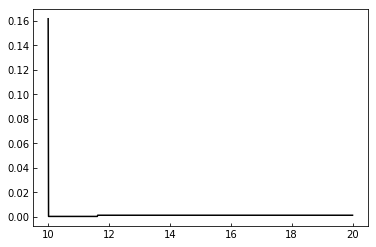

In [13]:
fig, ax = plt.subplots()

ax.plot(w_grid,Phi[0,:], 'k')
ax.tick_params(direction='in')

In [14]:
# proporção de empregados em steady-state
e=0
for j in range(N):
    e = e + g[j] * Phi_new[:,j]
    
desemprego = 1 - e
print('desemprego', np.round(desemprego, decimals=2))

desemprego [0.19]


In [15]:
#TODO: implementar 'duration' 